![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

# Pandas Data Cleaning

# Objectives

- Use lambda functions and DataFrame methods to transform data
- Handle missing data

In [2]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## To The Center!

That's right - we're still working with Austin Animal Center data! But now, let's check out the **Outcomes** data, instead of the Intakes data we were working with yesterday.

Data source: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [3]:
# Read in the animal center Outcomes data as df
# Can use parse_dates and pass a column name to read it as a datetime
df = pd.read_csv('data/Austin_Animal_Center_Outcomes_022822.csv',
                 parse_dates = ['DateTime', 'Date of Birth'])

In [4]:
# Check it out
df.head()
#df.tail()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [5]:
df.dtypes

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear                   object
Date of Birth       datetime64[ns]
Outcome Type                object
Outcome Subtype             object
Animal Type                 object
Sex upon Outcome            object
Age upon Outcome            object
Breed                       object
Color                       object
dtype: object

In [6]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137097 entries, 0 to 137096
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137097 non-null  object        
 1   Name              96095 non-null   object        
 2   DateTime          137097 non-null  datetime64[ns]
 3   MonthYear         137097 non-null  object        
 4   Date of Birth     137097 non-null  datetime64[ns]
 5   Outcome Type      137073 non-null  object        
 6   Outcome Subtype   62653 non-null   object        
 7   Animal Type       137097 non-null  object        
 8   Sex upon Outcome  137095 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137097 non-null  object        
 11  Color             137097 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.6+ MB


## Using Questions to Drive Both Exploration and Cleaning

The best way to think about how to both explore and clean your data set is to think about what is interesting in your data, what questions you have, what you want to know and how to actually get there. We're going to ask a few questions of our dataset, and use that to drive our 'cleaning' process (and talk a little bit about how and when to clean data in the process!)

## Question 1: What types of animals are in our data?

Let's think about what we need to answer the question.

- What feature(s) would we explore?

    - Animals
    
- What type of logic / calculation / function would help us explore?

    - value_count
    
- How can we explore visually?

    - pie chart or bar graph


In [7]:
# Let's explore
animal_types = df['Animal Type'].value_counts()
animal_types

Dog          77091
Cat          52092
Other         7253
Bird           636
Livestock       25
Name: Animal Type, dtype: int64

<AxesSubplot:ylabel='Animal Type'>

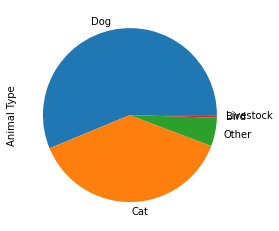

In [8]:
# Let's visualize
fig, ax = plt.subplots()
animal_types.plot(kind = 'pie')

<AxesSubplot:>

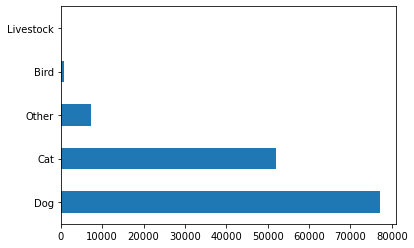

In [9]:
animal_types.plot(kind = 'barh')

Questions lead to other questions. For the above example, the visualization raises the question...

### What "Other" animals are in the dataset?

To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.   

Where might we look to find animal types within the Other category?

- 


In [17]:
# Let's subset down to only animals with type Other
others = df.loc[df['Animal Type'] == 'Other']
others.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
19,A725795,NaN,2016-05-03 12:39:00,May 2016,2016-04-15,Euthanasia,Underage,Other,Unknown,2 weeks,Opossum,Gray
27,A766700,NaN,2018-02-15 08:59:00,Feb 2018,2017-02-15,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat Mix,Brown
33,A765701,NaN,2018-01-25 09:39:00,Jan 2018,2017-01-25,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat Mix,Brown
40,A730464,NaN,2016-07-05 12:47:00,Jul 2016,2015-07-05,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat,Black/Brown


Let's use that column to answer our question.

In [82]:
# Let's explore
others['Breed'].value_counts()

Bat Mix                1756
Bat                    1681
Raccoon Mix             539
Raccoon                 518
Rabbit Sh Mix           341
                       ... 
Beveren Mix               1
Rhinelander Mix           1
Dutch/Angora-Satin        1
Britannia Petit Mix       1
Otter Mix                 1
Name: Breed, Length: 123, dtype: int64

In [21]:
others_top_10 = others['Breed'].value_counts().head(10)
others_top_10

Bat Mix           1756
Bat               1681
Raccoon Mix        539
Raccoon            518
Rabbit Sh Mix      341
Guinea Pig         313
Rabbit Sh          202
Opossum Mix        192
Opossum            156
Guinea Pig Mix     152
Name: Breed, dtype: int64

<AxesSubplot:>

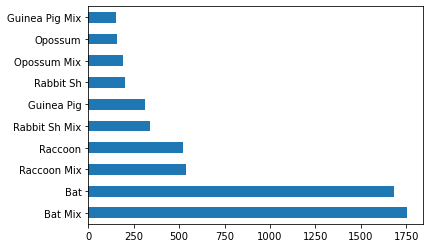

In [23]:
 # Let's visualize the top 10...
others_top_10.plot(kind = 'barh')

In [24]:
others_top_10.values

array([1756, 1681,  539,  518,  341,  313,  202,  192,  156,  152])

In [25]:
others_top_10.index

Index(['Bat Mix', 'Bat', 'Raccoon Mix', 'Raccoon', 'Rabbit Sh Mix',
       'Guinea Pig', 'Rabbit Sh', 'Opossum Mix', 'Opossum', 'Guinea Pig Mix'],
      dtype='object')

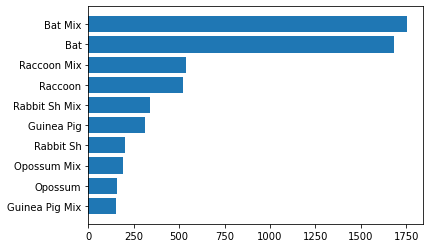

In [85]:
fig , ax = plt.subplots()
ax.barh( y = others_top_10.index, #index is the names of all the animals.
       width = others_top_10)

ax.invert_yaxis()

Seeing a lot of duplicates because of the word "Mix" in there. Having "Mix" doesn't give us any more information than the original subtype, so maybe we want to clean this column by removing "Mix" and see if that helps us explore these Other types.

In [86]:
# Let's use string methods to replace " Mix" with nothing ("")// .at allows us to dig specifically to a specific spot.
others.at[27, 'Breed'].replace(" Mix", '')

'Bat'

In [26]:
others['Breed'] = others['Breed'].str.replace(" ", "") #this is not using .at, and going through the whole "other" dataframe

<ipython-input-26-48dd1c463072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others['Breed'] = others['Breed'].str.replace(" ", "") #this is not using .at, and going through the whole "other" dataframe


In [29]:
# Sanity check
others.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
19,A725795,NaN,2016-05-03 12:39:00,May 2016,2016-04-15,Euthanasia,Underage,Other,Unknown,2 weeks,Opossum,Gray
27,A766700,NaN,2018-02-15 08:59:00,Feb 2018,2017-02-15,Euthanasia,Rabies Risk,Other,Unknown,1 year,BatMix,Brown
33,A765701,NaN,2018-01-25 09:39:00,Jan 2018,2017-01-25,Euthanasia,Rabies Risk,Other,Unknown,1 year,BatMix,Brown
40,A730464,NaN,2016-07-05 12:47:00,Jul 2016,2015-07-05,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat,Black/Brown


In [32]:
others_without_mix = others['Breed'].value_counts().head(10)
others_without_mix

BatMix          1756
Bat             1681
RaccoonMix       539
Raccoon          518
RabbitShMix      341
GuineaPig        313
RabbitSh         202
OpossumMix       192
Opossum          156
GuineaPigMix     152
Name: Breed, dtype: int64

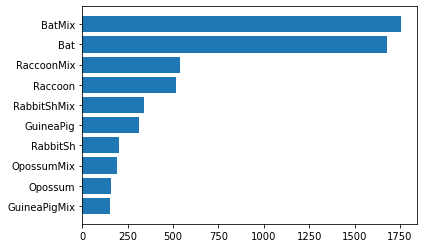

In [33]:
# Now let's visualize the top 10 again
fig, ax = plt.subplots()

ax.barh(y=others_without_mix.index, width=others_without_mix.values)

ax.invert_yaxis()

In [34]:
others['Breed'].value_counts()

BatMix              1756
Bat                 1681
RaccoonMix           539
Raccoon              518
RabbitShMix          341
                    ... 
AmericanSableMix       1
Cottontail             1
BelgianHareMix         1
TropicalMix            1
Snake/Snake            1
Name: Breed, Length: 123, dtype: int64

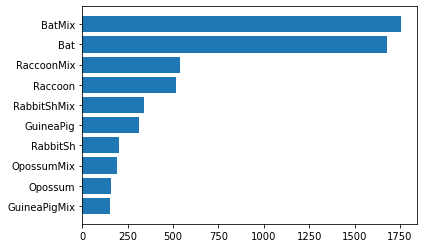

In [37]:
others_without_mix = others['Breed'].value_counts().head(10)

fig , ax = plt.subplots()

ax.barh( y = others_without_mix.index, #index is the names of all the animals.
       width = others_without_mix)

ax.invert_yaxis()

In [38]:
others_without_mix

BatMix          1756
Bat             1681
RaccoonMix       539
Raccoon          518
RabbitShMix      341
GuineaPig        313
RabbitSh         202
OpossumMix       192
Opossum          156
GuineaPigMix     152
Name: Breed, dtype: int64

## Question 2: How old are the animals in our dataset?

Let's try to answer this with the Age upon Outcome variable:

In [45]:
# Check out the Age column
df['Age upon Outcome'].head()

0     2 years
1      1 year
2      1 year
3    4 months
4      6 days
Name: Age upon Outcome, dtype: object

Ew. How in the world are we going to fix that up??

Any thoughts?

- 


In [72]:
# One way could be to split out the age number and age value
df['Age Number'] = df['Age upon Outcome'].str.split(" ").str[0] #Here, we pulled out the actual number

In [73]:
df['Age Units'] = df['Age upon Outcome'].str.split(" ").str[1] # Here, we pulled out the years

In [74]:
# Sanity check
df.tail(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units
137087,A690359,*Porridge,2022-02-26 11:34:00,Feb 2022,2014-06-19,Transfer,Partner,Dog,Neutered Male,7 years,Labrador Retriever Mix,Tan/White,7,years
137088,A851184,*Papaya,2022-02-28 11:38:00,Feb 2022,2021-02-08,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Orange Tabby/White,1,year
137089,A850725,Monty,2022-02-25 11:23:00,Feb 2022,2020-01-30,Adoption,NaN,Dog,Neutered Male,2 years,Labrador Retriever,Black/White,2,years
137090,A847804,*Mahalia,2022-02-28 11:42:00,Feb 2022,2011-12-08,Adoption,NaN,Cat,Spayed Female,10 years,Domestic Shorthair Mix,Brown Tabby/White,10,years
137091,A842414,NaN,2021-09-17 13:38:00,Sep 2021,2021-07-15,Adoption,NaN,Dog,Intact Female,2 months,Chihuahua Shorthair/Pug,Tan,2,months
137092,A850166,Rainey,2022-01-24 18:20:00,Jan 2022,2021-11-19,Adoption,NaN,Cat,Intact Male,2 months,Siamese,Seal Point,2,months
137093,A852031,Noodle,2022-02-28 12:50:00,Feb 2022,2020-02-23,Transfer,Partner,Dog,Neutered Male,2 years,Pomeranian/Chihuahua Longhair,Buff,2,years
137094,A845839,*Carmen,2022-02-28 13:49:00,Feb 2022,2020-05-05,Adoption,Foster,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,1,year
137095,A844321,Mia Marie,2022-02-28 13:04:00,Feb 2022,2013-10-15,Adoption,Foster,Dog,Spayed Female,8 years,Pit Bull,Black/White,8,years
137096,A813933,Lucille,2022-02-28 14:19:00,Feb 2022,2018-12-21,Adoption,NaN,Dog,Spayed Female,3 years,Belgian Malinois,Brown/Black,3,years


In [75]:
# Check the data types really quick...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137097 entries, 0 to 137096
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137097 non-null  object        
 1   Name              96095 non-null   object        
 2   DateTime          137097 non-null  datetime64[ns]
 3   MonthYear         137097 non-null  object        
 4   Date of Birth     137097 non-null  datetime64[ns]
 5   Outcome Type      137073 non-null  object        
 6   Outcome Subtype   62653 non-null   object        
 7   Animal Type       137097 non-null  object        
 8   Sex upon Outcome  137095 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137097 non-null  object        
 11  Color             137097 non-null  object        
 12  Age Number        137092 non-null  object        
 13  Age Units         137092 non-null  object        
dtypes: d

In [76]:
# Need to make our Age Number actual numbers! But...
df['Age Number'].astype(int) 

ValueError: cannot convert float NaN to integer

Alas! Nulls! Let's check out these null values:

In [77]:
# Check how many nulls we have in our original Age Upon Outcome column//.isna means looking for null.
df['Age upon Outcome'].isna().sum()

5

### Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

There are a few strategies we can choose from and they each have their pros/cons:

- **Fill with a Relevant Value**
    - If we know what the nulls 'should' be, easy to fill them with that value
    - For numbers, perhaps the null indicates a 0
    - Or, for string columns, might be easier to handle if we fill with "Missing" or "Unknown"
- **Fill with a Reasonable Value**
    - For numeric data, it might be acceptable to fill with a measure of central tendency (mean or median)
    - For categorical/string data, might be acceptable to fill with the most common (mode)
    - But beware! Filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!
- **Specify Missing Data**
    - If you plan to fill in missing values, it might make sense to specify that the data was originally missing by creating a new indicator column
    - This can be helpful when you suspect that the fact the data was missing could be important for an analysis.
- **Drop Missing Data**
    - While you should try to keep as much relevant data as possible, sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data
    - We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case



So: what should we do about the missing Age upon Outcome data?

- 


In [78]:
# No matter what - better to make this change on a COPY of the dataframe
df_clean = df.copy() #Once we are done fixing our mistakes, we go and make a copy. 

In [79]:
df_clean['Age upon Outcome'].isna().sum() / len(df)

3.64705281661889e-05

In [80]:
# Code here to handle nulls
df_clean = df_clean.dropna(subset = ['Age upon Outcome'])

In [81]:
# Sanity check
df_clean["Age upon Outcome"].isna().sum()

0

In [83]:
# Cool - now we can make our Age Number column an integer
df_clean['Age Number'] = df_clean['Age Number'].astype('int')

In [84]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137092 entries, 0 to 137096
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137092 non-null  object        
 1   Name              96093 non-null   object        
 2   DateTime          137092 non-null  datetime64[ns]
 3   MonthYear         137092 non-null  object        
 4   Date of Birth     137092 non-null  datetime64[ns]
 5   Outcome Type      137069 non-null  object        
 6   Outcome Subtype   62649 non-null   object        
 7   Animal Type       137092 non-null  object        
 8   Sex upon Outcome  137091 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137092 non-null  object        
 11  Color             137092 non-null  object        
 12  Age Number        137092 non-null  int64         
 13  Age Units         137092 non-null  object        
dtypes: d

Now let's do something about those Age Values...

### Map, Apply and Applymap

Resource: https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary.

The `.apply()` method is similar to the `.map()` method for Series, but can only take in functions. 

The `.applymap()` method only works on DataFrames, and applies the same transformation to every element (cell) of that DataFrame.

In [106]:
df_clean['Age Units']

0          years
1           year
2           year
3         months
4           days
           ...  
137092    months
137093     years
137094      year
137095     years
137096     years
Name: Age Units, Length: 137092, dtype: object

In [85]:
# Providing this dictionary to capture age values in # days (not perfect)
age_vals = {
    'years': 365,
    'year': 365,
    'months': 30,
    'month': 30,
    'weeks': 7,
    'week': 7,
    'days': 1,
    'day': 1
}

In [87]:
# Now, how can we transform the Age Value column to capture these values?
df_clean['Age Units Int'] = df_clean['Age Units'].map(age_vals) #This also changed out series into integers. 

In [89]:
# Sanity check
df_clean.tail()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int
137092,A850166,Rainey,2022-01-24 18:20:00,Jan 2022,2021-11-19,Adoption,NaN,Cat,Intact Male,2 months,Siamese,Seal Point,2,30,NaN
137093,A852031,Noodle,2022-02-28 12:50:00,Feb 2022,2020-02-23,Transfer,Partner,Dog,Neutered Male,2 years,Pomeranian/Chihuahua Longhair,Buff,2,365,NaN
137094,A845839,*Carmen,2022-02-28 13:49:00,Feb 2022,2020-05-05,Adoption,Foster,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,1,365,NaN
137095,A844321,Mia Marie,2022-02-28 13:04:00,Feb 2022,2013-10-15,Adoption,Foster,Dog,Spayed Female,8 years,Pit Bull,Black/White,8,365,NaN
137096,A813933,Lucille,2022-02-28 14:19:00,Feb 2022,2018-12-21,Adoption,NaN,Dog,Spayed Female,3 years,Belgian Malinois,Brown/Black,3,365,NaN


In [90]:
# Now, let's make a new Age in Days column!
df_clean["Age in Days"] = df_clean['Age Number'] * df_clean['Age Units']

In [91]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int,Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,NaN,730
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,NaN,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,NaN,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,NaN,120
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,NaN,6


<AxesSubplot:>

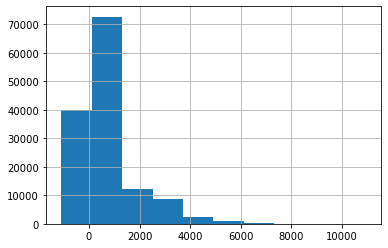

In [92]:
# Now we can visualize!
df_clean['Age in Days'].hist()

In [99]:
# Of course, we could also try...
df_clean['Calculated Age in Days'] = df_clean['DateTime'].dt.normalize() - df_clean['Date of Birth'] #Normalize converts 
#our time to midnight and gets rid of the time aspect om 'Calculated Age in Days. Otherwise, a time would show up'

In [100]:
# Check it
df_clean

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int,Age in Days,Calculated Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,NaN,730,736 days
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,NaN,365,371 days
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,NaN,365,366 days
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,NaN,120,128 days
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,NaN,6,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137092,A850166,Rainey,2022-01-24 18:20:00,Jan 2022,2021-11-19,Adoption,NaN,Cat,Intact Male,2 months,Siamese,Seal Point,2,30,NaN,60,66 days
137093,A852031,Noodle,2022-02-28 12:50:00,Feb 2022,2020-02-23,Transfer,Partner,Dog,Neutered Male,2 years,Pomeranian/Chihuahua Longhair,Buff,2,365,NaN,730,736 days
137094,A845839,*Carmen,2022-02-28 13:49:00,Feb 2022,2020-05-05,Adoption,Foster,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,1,365,NaN,365,664 days
137095,A844321,Mia Marie,2022-02-28 13:04:00,Feb 2022,2013-10-15,Adoption,Foster,Dog,Spayed Female,8 years,Pit Bull,Black/White,8,365,NaN,2920,3058 days


## Question 3: Are Most of The Animals Already Fixed?

Let's use `.map()` to turn the Sex upon Outcome column into a category with three values: Fixed, Intact, or Unknown. 

In [101]:
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int,Age in Days,Calculated Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,NaN,730,736 days
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,NaN,365,371 days
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,NaN,365,366 days
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,NaN,120,128 days
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,NaN,6,6 days


In [104]:
# Check out what's currently in that column
df_clean['Sex upon Outcome'].unique()

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

In [105]:
df_clean['Sex upon Outcome'].value_counts()

Neutered Male    48299
Spayed Female    43578
Intact Male      17408
Intact Female    16904
Unknown          10902
Name: Sex upon Outcome, dtype: int64

In [106]:
# Let's write up a function for this!
def fixed_mapper(status):
    '''
    Takes in the current status of animals and outputs whether they have been fixed
    
    Input:
    - status - str
        A string value that details the current status of the animal, where 'Intact'
        indicates the animal has not been fixed. Could also be null
        
    Output:
    - consolidated_status - str
        'Intact' for not fixed, 'Fixed' for spayed/neutered, or 'Unknown'
    '''
    if status in ['Intact Male', 'Intact Female']:
        return "Intact"
    elif status in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    else:
        return 'Unknown'

In [107]:
# Now let's use it!
df_clean['Fixed Status'] = df_clean['Sex upon Outcome'].apply(fixed_mapper) #we can also use .map

In [108]:
# We had a null in that column before, did that change?
#df_clean.info()
df_clean.isna().sum()

Animal ID                      0
Name                       40999
DateTime                       0
MonthYear                      0
Date of Birth                  0
Outcome Type                  23
Outcome Subtype            74443
Animal Type                    0
Sex upon Outcome               1
Age upon Outcome               0
Breed                          0
Color                          0
Age Number                     0
Age Units                      0
Age Units Int             137092
Age in Days                    0
Calculated Age in Days         0
Fixed Status                   0
dtype: int64

<AxesSubplot:ylabel='Fixed Status'>

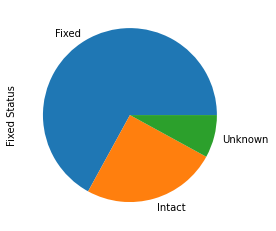

In [150]:
# Visualize it!
df_clean['Fixed Status'].value_counts().plot(kind='pie')

## A Quick Aside - for Lambda Functions!

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

These can often be great as map transformation functions, but they can only do so much.

Let's use them to fill some nulls!

In [151]:
# Check which columns still have null values
df_clean.isna().sum()

Animal ID               0
Name                40999
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     74443
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Units               0
Age in Days             0
Fixed Status            0
dtype: int64

In [154]:
df_clean['Outcome Subtype'].head()

0        NaN
1        NaN
2        NaN
3        NaN
4    Partner
Name: Outcome Subtype, dtype: object

Let's look at Outcome Subtype - a lot of nulls, why do we think that is? What would be an appropriate strategy here?

- #Takes a lot more effort to classify/Specify
- #Some outcomes likely don't have subtypes. 


In [155]:
# Let's try it! Use map and a lambda function
# Note: need to use x is np.nan as our if condition
df_clean["Outcome Subtype"].map(lambda x: 'N/A' if x is np.nan else x) #Notice how our NaN turned into N/A. 

0             N/A
1             N/A
2             N/A
3             N/A
4         Partner
           ...   
137092        N/A
137093    Partner
137094     Foster
137095     Foster
137096        N/A
Name: Outcome Subtype, Length: 137092, dtype: object

In [109]:
# BUT! Pandas has a function for this
df_clean['Outcome Subtype'].fillna('N/A')

0             N/A
1             N/A
2             N/A
3             N/A
4         Partner
           ...   
137092        N/A
137093    Partner
137094     Foster
137095     Foster
137096        N/A
Name: Outcome Subtype, Length: 137092, dtype: object

In [110]:
# Fill nulls here
df_clean['Outcome Type'] = df_clean['Outcome Type'].fillna("Unknown")

In [111]:
# Sanity Check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int,Age in Days,Calculated Age in Days,Fixed Status
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,NaN,730,736 days,Fixed
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,NaN,365,371 days,Fixed
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,NaN,365,366 days,Unknown
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,NaN,120,128 days,Fixed
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,NaN,6,6 days,Intact


### One More Strategy: Build a Missing Indicator

While this doesn't directly answer a question we have, let's go ahead and build a new column to indicate where Name is null (just to demo).

This can be quite useful when modeling, if the data being missing actually means something!

In [112]:
# Quick pandas method for this
df_clean['Name_Missing'] = df_clean['Name'].isna() # This is when we want to build another column 
# to show if it is nullor not. 


Might be more interesting to build an indicator of where "Mix" is in the Breed column

In [113]:
# Let's do it
df_clean['Mix Breed'] = df_clean['Breed'].str.contains(" Mix")

In [114]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Age Units Int,Age in Days,Calculated Age in Days,Fixed Status,Name_Missing,Mix Breed
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,NaN,730,736 days,Fixed,False,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,NaN,365,371 days,Fixed,False,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,NaN,365,366 days,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,NaN,120,128 days,Fixed,False,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,NaN,6,6 days,Intact,True,True


## Comparing Before and After

We can now see all the work we did!

In [131]:
# Original data


In [132]:
# Missing data cleaned


# Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [133]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

df.applymap(type).head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units
0,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


# Level Up: Faster NumPy Methods

In general, `np.where()` and `np.select()` are faster than `map()`. This won't matter too much with reasonably-sized data but can be a consideration for ***big data***.

In [134]:
# Let's copy the dataframe to play around with
level_up = df.copy()

In [135]:
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days


## NumPy's `where()` Method

In [136]:
# First pass a condition
level_up['Adopted1'] = np.where(level_up['Outcome Type'] == 'Adoption',
                                True,  # What to fill with if the condition is true
                                False)  # What to fill with if not true
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Adopted1
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months,True
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days,False


In [137]:
level_up['Adopted2'] = level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Units,Adopted1,Adopted2
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years,False,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year,False,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months,True,True
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days,False,False


In [138]:
# Let's time how long it takes np.where() to run by running it multiple times
%timeit np.where(level_up['Outcome Type'] == 'Adoption', True, False)

8.04 ms ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [139]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)

16.1 ms ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## NumPy's `select()` Method

Again, `numpy` will be faster:

In [115]:
# Define our list of conditions
conditions = [level_up['Sex upon Outcome'] == 'Neutered Male',
              level_up['Sex upon Outcome'] == 'Spayed Female',
              level_up['Sex upon Outcome'] == 'Intact Male',
              level_up['Sex upon Outcome'] == 'Intact Female',
              level_up['Sex upon Outcome'] == 'Unknown',
              level_up['Sex upon Outcome'].isna()]

# Define a matching list of outcomes
choices = ['Fixed', 'Fixed', 'Intact', 'Intact', 'Unknown', 'Unknown']

NameError: name 'level_up' is not defined

In [116]:
# Use np.select
level_up['Grouped Sex upon Outcome1'] = np.select(conditions, choices)
level_up['Grouped Sex upon Outcome1']

NameError: name 'conditions' is not defined

In [67]:
# Check we got the same results with np.where()
(level_up['Grouped Sex upon Outcome1'] != level_up['Grouped Sex upon Outcome']).sum()

KeyError: 'Grouped Sex upon Outcome'

In [ ]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Sex upon Outcome'].map(fixed_mapper)

In [ ]:
# Let's time how long it takes np.select() to run by running it multiple times
%timeit np.select(conditions, choices)